<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      learning rate
    no_bias : bool
      True if no bias term is included.
    verbose : bool
      True if you want to output the learning process.

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record loss to training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss against verification data
    """
    
    def __init__(self, num_iter=100, lr=0.01, C=1,
                 random_state=None,bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_combination(self,X):
        """
        Join linearly

        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          The following form of ndarray, shape (n_samples, n_features+1)
          linear combination
        """
        x1 = X
        
        # Create x0 (bias term)
        if self.bias == True:
            x0 = np.ones(x1.shape[0])
        else:
            x0 = np.zeros(x1.shape[0])
        
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
        
        
    def _hypothetical_function(self,X):
        """
        Compute the assumed function of a linear

        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimation results with linear assumed functions

        """
        x = X
        z = np.dot(x,self.theta)
        
        return 1/(1+np.exp(-z))
    
    def _gradient_descent(self, X, error):
        """
        Using the steepest descent method, the value of θ is updated and learned.
        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        error : Error between true value and estimated value
        """
        # tmp to add regularization (lamda) to i=1,2,...
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
        #self.theta -= self.lr*np.dot(error,X)/len(X)
        #self.theta[1:] -= self.lr*self.lamda*self.theta[1:]/len(X)
        
    def _loss_function(self, y, yhat):
        """
        Calculate the loss function for logistic regression.
        Parameters
        ----------
        y : The following form of ndarray, shape (n_samples, )
            Correct answer value of training data
        yhat : The following form of ndarray, shape (n_samples, )
            Correct value of validation data
        """
        
        return np.mean(-y*np.log(yhat) -(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        Learn logistic regression.
        When valid data is input, the loss and accuracy for it are also calculated for each iteration.
        When valid data is input, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : The following form of ndarray, shape (n_samples, n_features)
            Features of validation data
        y_val : The following form of ndarray, shape (n_samples, )
            Correct value of validation data
        """
        # Get the label value of y
        self.ylabel = np.unique(y)
        
        # Replace the label value of y with 0,1
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # linear combination
        X = self._linear_combination(X)
        
        # Give the initial value of parameter θ as a random number.
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # Predicted probability
            yhat = self._hypothetical_function(X)
            
            # measurement error
            error = yhat - y            
            self.loss[i] = self._loss_function(y,yhat)
            
            if (type(X_val) != bool):
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        # Save θ
        np.save('theta', self.theta)
        
            

    def predict(self, X):
        """
        Use logistic regression to estimate the labels.
        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
            Sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimation results by logistic regression
        """
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        """
        Use logistic regression to estimate probabilities.
        Parameters
        ----------
        X : The following form of ndarray, shape (n_samples, n_features)
            Sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimation results by logistic regression
        """
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)

In [47]:
x1=np.array([0,1,2,3,4,5,6,7,8])
y=np.array([2,4,2,1,6,7,8,5,2])
x0= np.ones(x1.shape[0])
X=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
print('x:\n',X)

x:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


In [48]:

theta=np.random.randn(X.shape[1])
print('theta:\n',theta)

theta:
 [ 0.36659604 -0.22316949]


In [49]:
z=np.dot(X,theta)
print('z:\n',z)

z:
 [ 0.36659604  0.14342655 -0.07974294 -0.30291243 -0.52608192 -0.74925141
 -0.9724209  -1.19559039 -1.41875988]


In [50]:
y=1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.59063621 0.5357953  0.48007482 0.42484567 0.37143118 0.32098444
 0.27439823 0.23226059 0.19485607]


In [51]:
print 

<function print>

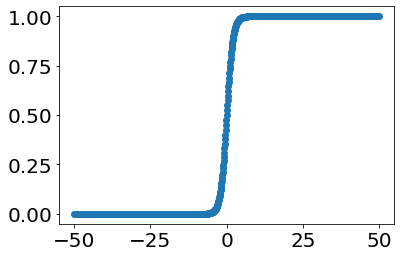

In [52]:
z1=np.arange(-50,50,0.1)
y1=1/(1+np.exp(-z1))

plt .scatter(z1,y1)
plt.show;
 

In [53]:
X.shape

(9, 2)

In [54]:
y.shape

(9,)

In [55]:
x1=np.array([2,1,5,6,4]).reshape(-1,1)
x0= np.ones(x1.shape[0])
x=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
y=np.array([0.4,0.5,0.2,0.1,0.9])
yhat=np.where(y<0.5,0,1)
y_test=np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [56]:
theta=np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [ 1.22786805 -1.1160425 ]


In [57]:
error=yhat-y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [58]:
lm=np.array([0,1])
theta*lm

array([ 0.       , -1.1160425])

In [59]:
0.01*np.dot(error,x)/len(x)+theta*lm/len(x)

array([-0.002    , -0.2272085])

In [60]:
theta-=(0.01*np.dot(error,x)/len(x)+theta*lm/len(x))
print ('theta:\n', theta)


theta:
 [ 1.22986805 -0.888834  ]


In [61]:
theta-=(0.01*np.dot(error,x)/len(x)+theta*lm/len(x))
theta

array([ 1.23186805, -0.7070672 ])

In [62]:

x1=np.array([2,1,5,6,4]).reshape(-1,1)
x2=np.array([2,1,5,2,4]).reshape(-1,1)
y=np.array([1,1,0,0,1])
print('x1:\n',x1)
print('x2:\n',x2)
print('y:\n',y)


x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x2:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 1 0 0 1]


In [63]:
import numpy as np
clf=ScratchLogisticRegression()
clf.fit(x1,y,x1,y)
y_proba=clf.predict_proba(x2)
y_pred=clf.predict(x2)

In [64]:
print('y_proba:\n', y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.45637329 0.47814497 0.39236561 0.45637329 0.41340584]
y_pred:
 [0 0 0 0 0]


In [65]:
y1=np.ones(99)
y2=np.zeros(99)
yh=np.arange(0.01,1.0,0.01)

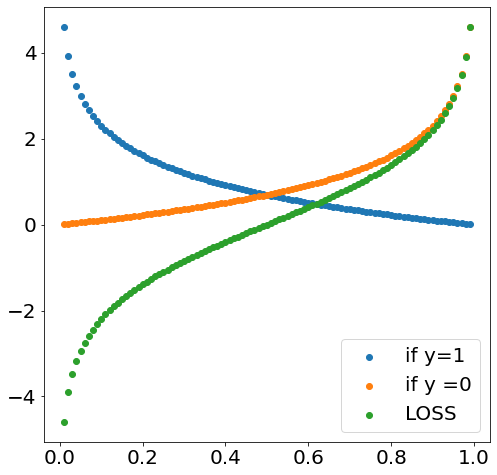

In [66]:
j1=-y1*np.log(yh)-(1-y1)*np.log(1-yh)
j2=y2*np.log(yh)-(1-y2)*np.log(1-yh)
j=y1*np.log(yh)-(1-y2)*np.log(1-yh)

fig,ax=plt.subplots(figsize=(8,8))
plt.rcParams["font.size"]=20
plt.scatter(yh,j1,label='if y=1')
plt.scatter(yh,j2,label='if y =0')
plt.scatter(yh,j,label='LOSS')
plt.legend();

In [67]:
from sklearn.datasets import  load_iris
data=load_iris().data
target=load_iris().target.reshape(-1,1)





In [68]:
iris=np.concatenate([data,target],axis=1)
iris=pd.DataFrame(iris)
iris.shape

(150, 5)

In [69]:
disp=False
if disp==True:
   sns.pairplot(iris,palette='tab10');

In [70]:
iris_X=iris.loc[iris[4]!=0,2:3].values
iris_y=iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [71]:
from sklearn.model_selection  import train_test_split
X=iris_X
y=iris_y
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=0)
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape',X_valid.shape)
print('y_valid.shape',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape (20, 2)
y_valid.shape (20,)


In [72]:
np.unique(y)

array([1., 2.])

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std= scaler.transform(X_train)
X_valid_std= scaler.transform(X_valid)

In [74]:
clf=ScratchLogisticRegression(num_iter=500,lr=0.01,C=0.01,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred=clf.predict(X_valid_std)
y_prob=clf.predict_proba(X_valid_std)

In [75]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [76]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [77]:
y_proba

array([0.45637329, 0.47814497, 0.39236561, 0.45637329, 0.41340584])

In [78]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid,y_pred)
precision=precision_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


In [79]:
from sklearn.linear_model import LogisticRegression
clf2=LogisticRegression()
clf2.fit(X_train_std,y_train)


y_pred2=clf2.predict(X_valid_std)
y_prob2= clf2.predict_proba(X_valid_std)


In [80]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [81]:
y_prob

array([0.45724675, 0.65176445, 0.47852354, 0.67646864, 0.59783009,
       0.65798269, 0.45042721, 0.52141698, 0.63849648, 0.61220533,
       0.57039083, 0.54969532, 0.61185706, 0.45024568, 0.30490789,
       0.3485144 , 0.47852354, 0.40856748, 0.50693972, 0.4291914 ])

In [82]:
accuracy=accuracy_score(y_valid,y_pred2)
precision=precision_score(y_valid,y_pred2)
recall=recall_score(y_valid,y_pred2)
f1=f1_score(y_valid,y_pred2)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


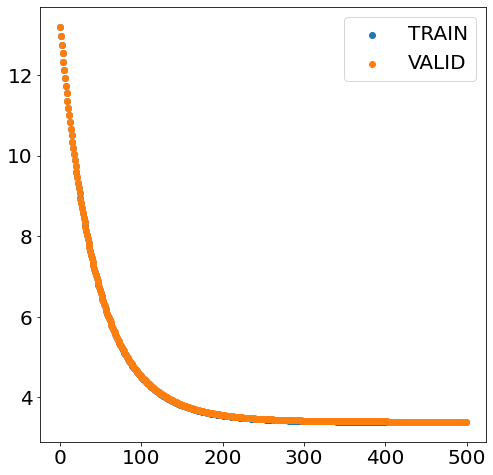

In [83]:
fig,ax=plt.subplots(figsize=(8,8))
plt.rcParams["font.size"]=20
plt.scatter(range(len(clf.loss)),clf.loss,label='TRAIN')
plt.scatter(range(len(clf.val_loss)),clf.val_loss,label='VALID')
plt.legend();

In [86]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


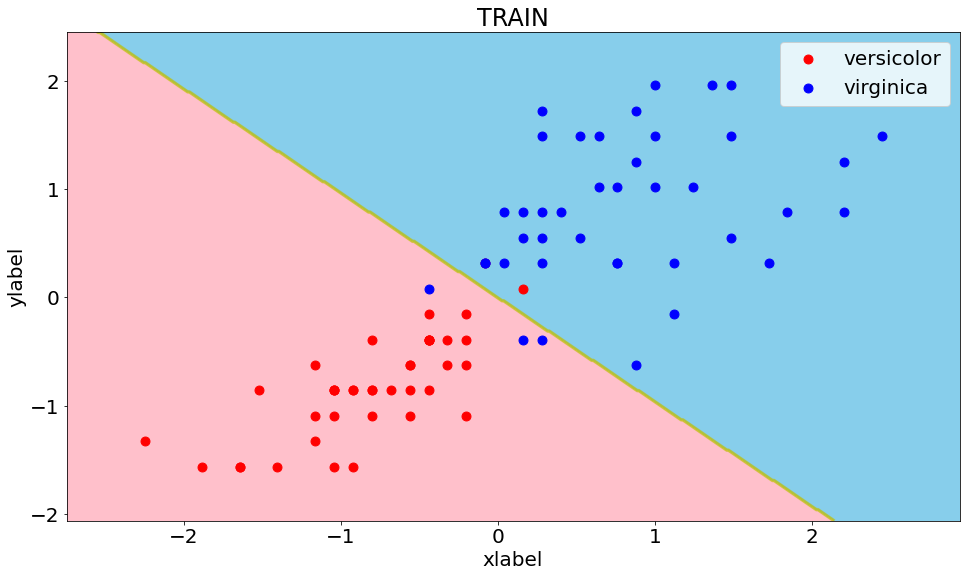

In [87]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN')

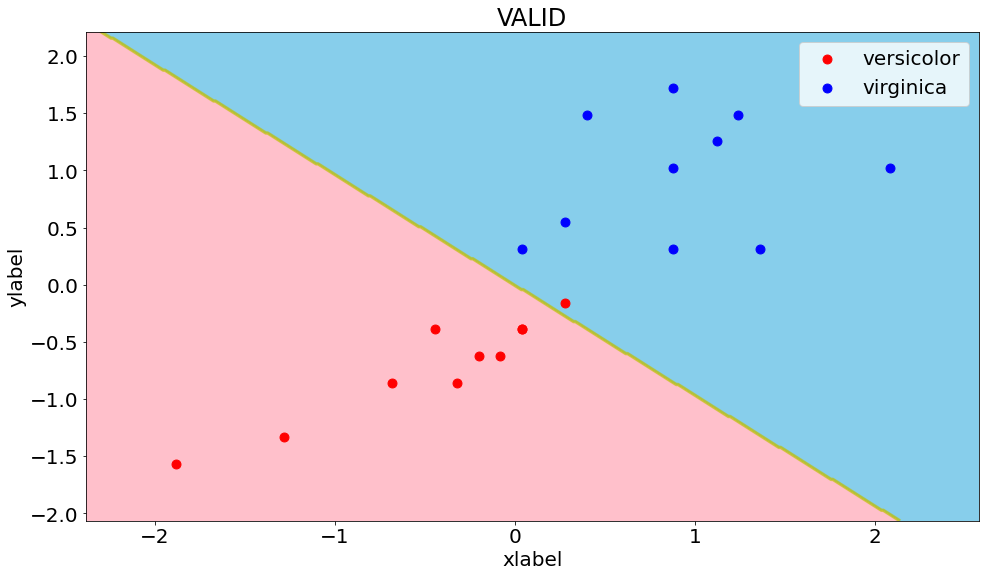

In [88]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')

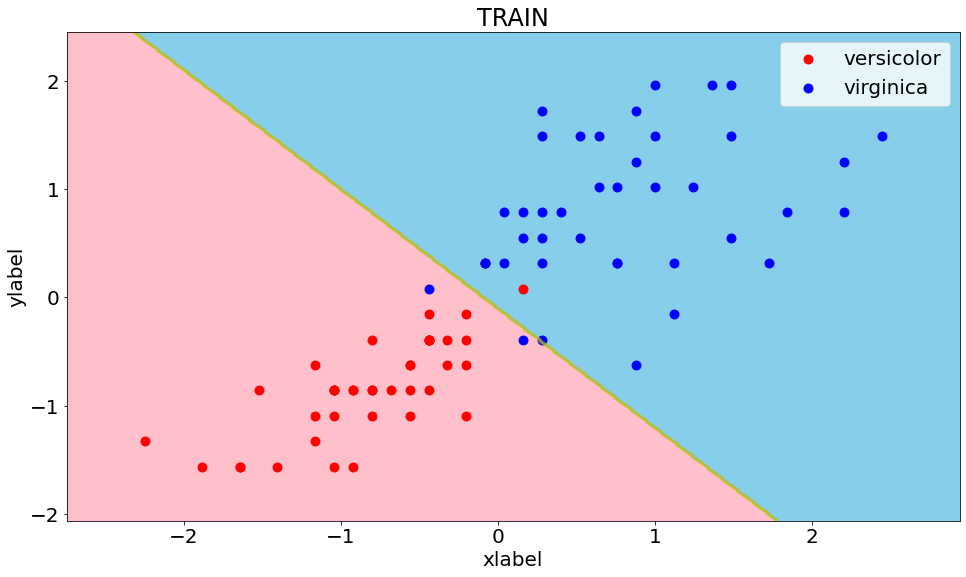

In [89]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='TRAIN')

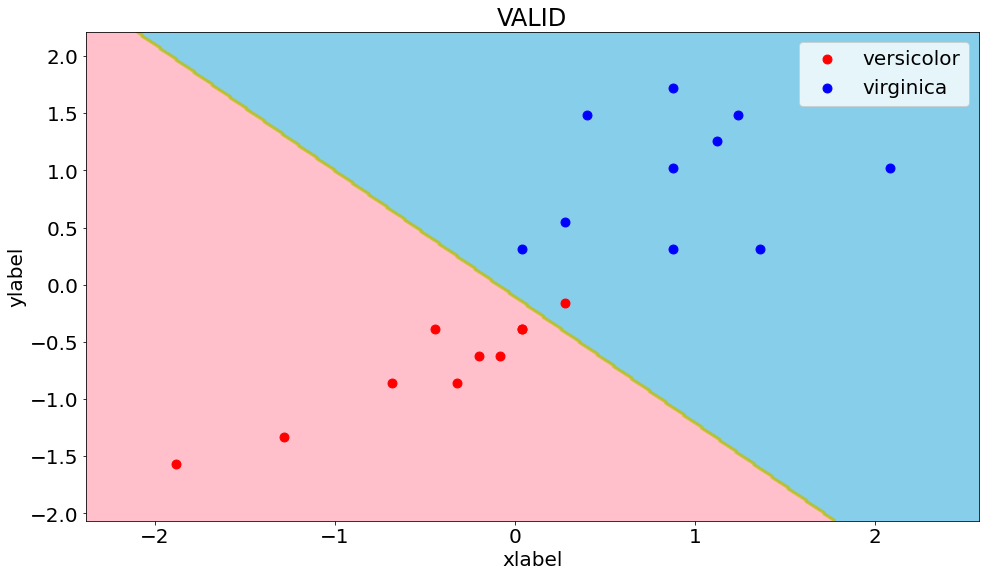

In [90]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='VALID')

In [91]:
np.load('theta.npy')

array([0.8738873 , 0.23509064, 0.24362304])